In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import math

In [2]:
#Ok hay que hacer - Set de datos
#1) Realizar un análisis estadístico básico del conjunto de datos, como calcular las estadísticas descriptivas (media, mediana, desviación estándar, etc.) 
#y la correlación entre las diferentes características.

#2) Visualizar los datos mediante gráficos para comprender mejor la relación entre las diferentes características y la calidad del vino.
#Por ejemplo, se pueden crear gráficos de dispersión para visualizar la relación entre cada característica y la calidad del vino.

#3) Realizar una limpieza de datos básica para tratar los valores perdidos y 
#los datos atípicos, que pueden afectar la precisión del modelo de regresión.

#4) Preprcesar los datos para meter las etiquetas de los valores buenos y malos

#5) Probarlo con las librerias y luego con el modelo manual y esperar que este bien xd 



# 1- Análisis estadístico

In [3]:
# Cargar el conjunto de datos en un marco de datos
df = pd.read_csv("WineDataSet/winequality-red.csv")

#Varios valores estadisticos
print(df.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar   
count    1599.000000       1599.000000  1599.000000     1599.000000  \
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1599.000000          1599.000000           1599.000000  1599.000000  \
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [4]:
# Cargar el conjunto de datos en un marco de datos
df = pd.read_csv("WineDataSet/winequality-red.csv")

# Calcular la matriz de correlación
corr = df.corr()

# Calcular la correlación entre cada variable y la calidad del vino
corrFA = df.corr()['fixed acidity']
corrVA = df.corr()['volatile acidity']
corrCA = df.corr()['citric acid']
corrRS = df.corr()['residual sugar']
corrC = df.corr()['chlorides']
corrFSD = df.corr()['free sulfur dioxide']
corrTSD = df.corr()['total sulfur dioxide']
corrD = df.corr()['density']
corrPH = df.corr()['pH']
corrS = df.corr()['sulphates']
corrA = df.corr()['alcohol']
corrQ = df.corr()['quality']

# Imprimir la correlación de cada variable con todas las demás variables
#print(corrCA)

# Cuales son los resultados que se tiene de calidad.
df["quality"].unique()


array([5, 6, 7, 4, 8, 3], dtype=int64)

# 2- Visualización de los datos

<Axes: >

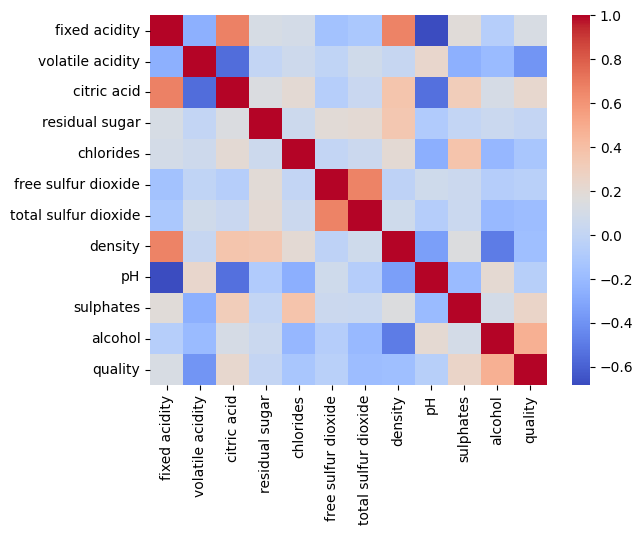

In [5]:
# Graficar la matriz de correlación utilizando un mapa de calor
sns.heatmap(corr, cmap='coolwarm')

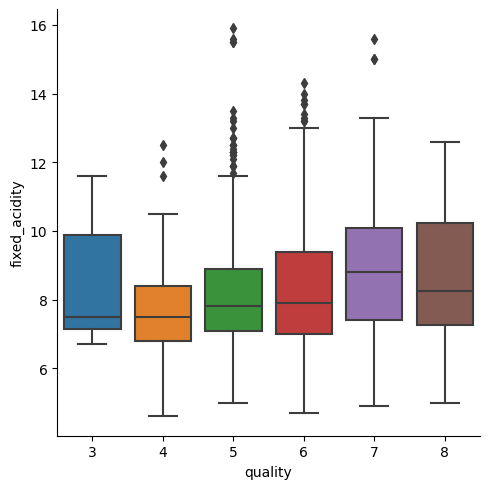

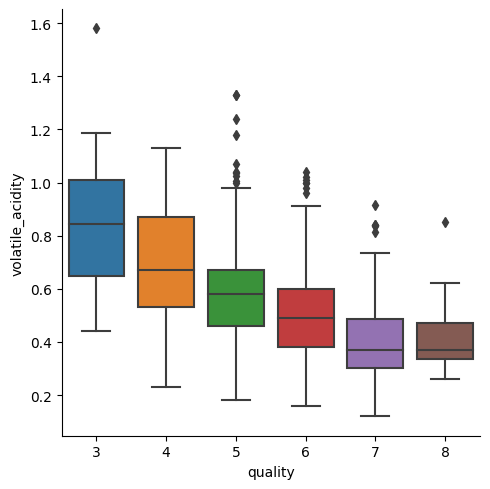

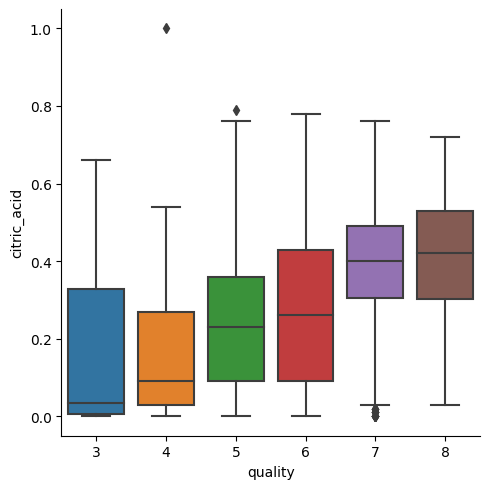

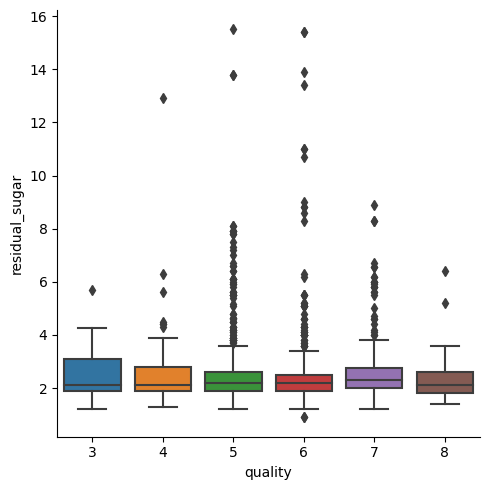

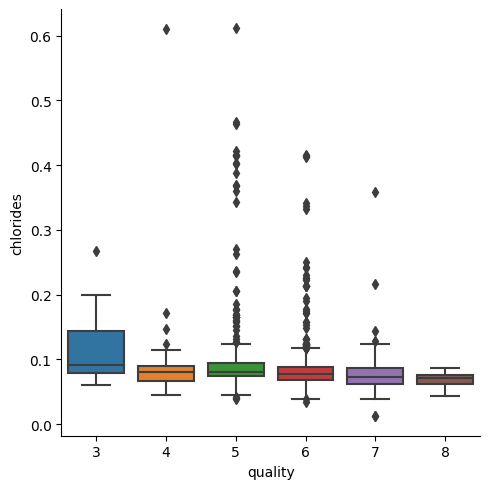

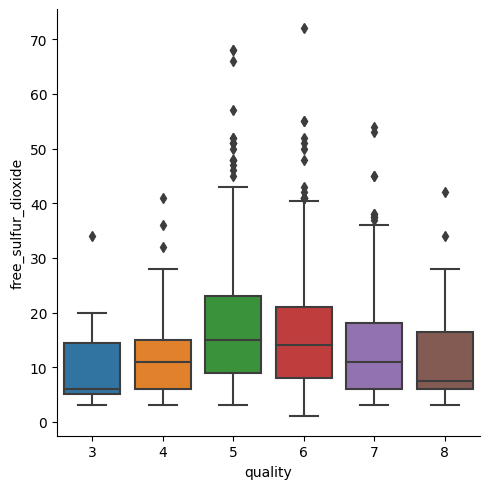

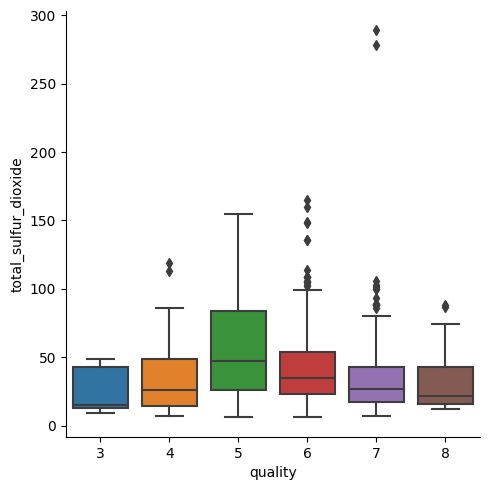

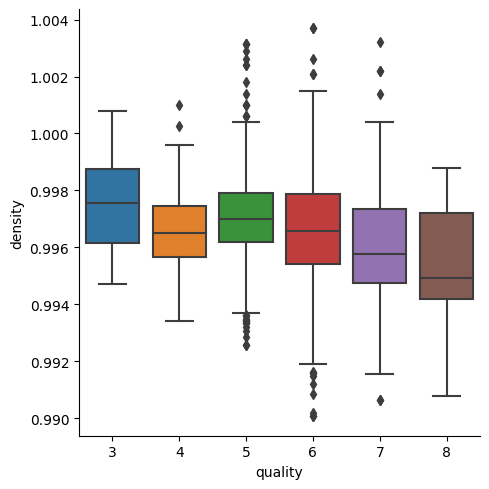

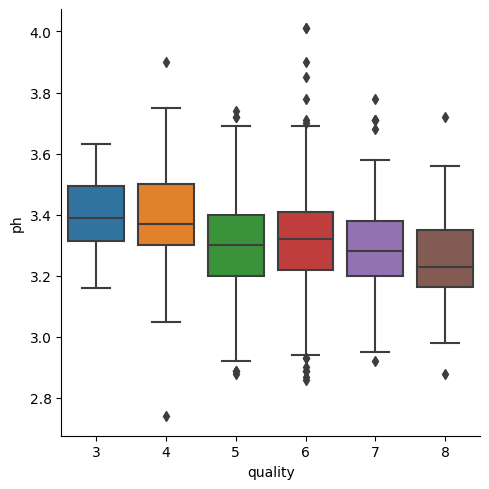

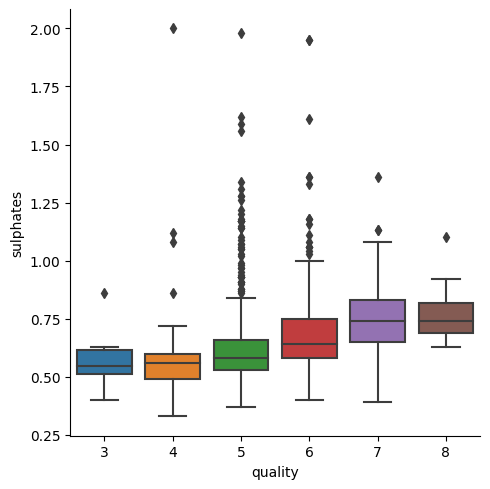

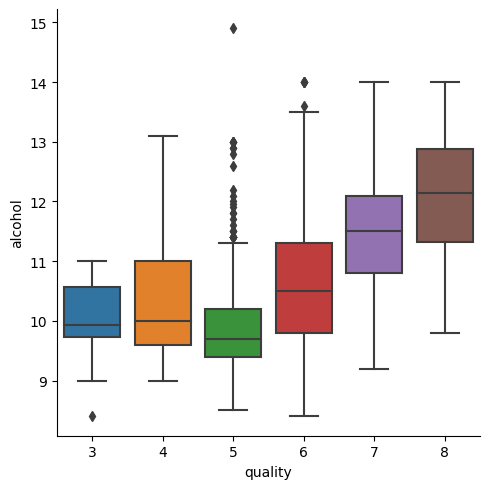

In [6]:
# Crea la gráfica de cajas

# Convierte los nombres de las columnas a minúsculas y reemplaza los espacios por guiones bajos
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Muestra las gráficas de cajas para todos los features
for feature in df.columns[:-1]:
    sns.catplot(data=df, x='quality', y=feature, kind='box')


In [7]:
#Nota: Hay muchos valores atípicos

# 3- Normalización

In [8]:
# Cargar el conjunto de datos
data= pd.read_csv("WineDataSet/winequality-red.csv")

# Imputar valores faltantes
imputer = SimpleImputer(strategy="median")
imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Eliminar valores atípicos
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
data = data[~((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)]

# Normalizar las variables de entrada
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(imputed_data.iloc[:, :-1]), columns=imputed_data.columns[:-1])

# Agregar la variable de salida
normalized_data["quality"] = imputed_data["quality"]

# Guardar los datos normalizados en un nuevo archivo CSV
#normalized_data.to_csv("WineDataSet/winequality-red-normalized.csv", index=False)

print(normalized_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0       0.247788          0.397260         0.00        0.068493   0.106845  \
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates   
0             0.140845              0.098940  0.567548  0.606299   0.137725  \
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      5.0  
1  0.21538

# 4 - Preprocesamiento


In [9]:
# Leer el archivo CSV y cargarlo en un dataframe
normalized_data = pd.read_csv("WineDataSet/winequality-red-normalized.csv")

# Convertir la columna "quality" en una etiqueta binaria
# Mal vino: 0-5
# Buen vino: 6-10
normalized_data["quality"] = pd.cut( normalized_data["quality"], bins = [0, 5, 10], labels = ["Mal vino", "Buen vino"])

# Contar cuántas etiquetas hay de cada tipo
print(normalized_data["quality"].value_counts())

# Codificar la etiqueta binaria como números usando LabelEncoder
lb = LabelEncoder()
normalized_data["quality"] = lb.fit_transform(normalized_data["quality"])

# Separar el conjunto de datos en variables de entrada y de salida
x = normalized_data.drop("quality", axis = 1)
y = normalized_data["quality"]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 10, stratify=y)



quality
Buen vino    633
Mal vino     546
Name: count, dtype: int64


In [10]:
#Cuantas veces aparecen mal y buen vino, en el set de train
print(Counter(y_train))

Counter({0: 506, 1: 437})


# 5- Aplicar modelo con librerias

In [77]:
# Definir los parámetros que deseas ajustar y los valores que deseas probar
param_grid_arbol = {'max_depth': [3, 5, 7],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4],
                    'criterion': ['gini', 'entropy']}

#Arbol de decisiones
arbolDesiciones = DecisionTreeClassifier()

# Crear un objeto GridSearchCV
grid_arboles = GridSearchCV(arbolDesiciones, param_grid_arbol, cv=5)

grid_arboles.fit(X_train, y_train)
y_respuesta = grid_arboles.predict(X_test)

#arbolDesiciones.fit(X_train, y_train)
#y_respuesta = arbolDesiciones.predict(X_test)

print("Mejores parámetros:", grid_arboles.best_params_)
print("Mejor puntuación:", grid_arboles.best_score_)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mejor puntuación: 0.7052290892716424


Accuracy: 0.69
Precision: 0.75
Recall: 0.50


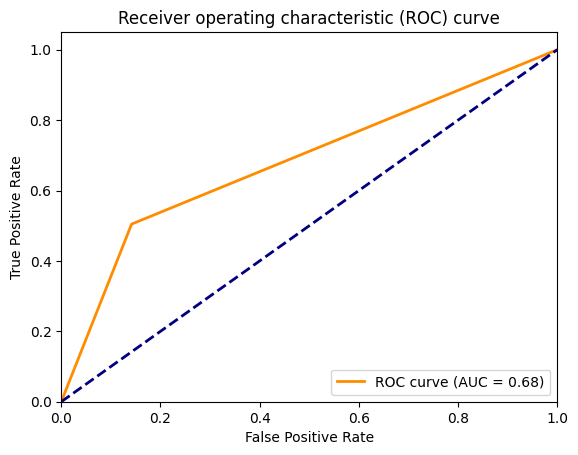

In [78]:
# Accuracy
accuracy = accuracy_score(y_test, y_respuesta)

# Precision
precision = precision_score(y_test, y_respuesta)

# Recall
recall = recall_score(y_test, y_respuesta)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test, y_respuesta)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [81]:
# Definir los parámetros que deseas ajustar y los valores que deseas probar
param_grid_knn = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

#KNN
knn = KNeighborsClassifier()

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(knn, param_grid_knn, cv=5)

# Ajustar el objeto GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Utilizar el objeto GridSearchCV para predecir en los datos de prueba
y_predKNN = grid_search.predict(X_test)

#y_predKNN = sklearn_classifier.predict(X_test)

# Evaluar el modelo ajustado utilizando métricas de evaluación apropiadas
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

Mejores parámetros: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Mejor puntuación: 0.7603793763368231


Accuracy: 0.77
Precision: 0.78
Recall: 0.70


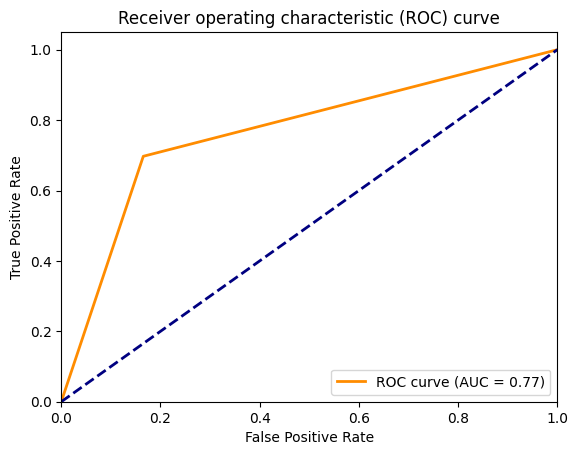

In [82]:
# Accuracy
accuracy = accuracy_score(y_test, y_predKNN)

# Precision
precision = precision_score(y_test, y_predKNN)

# Recall
recall = recall_score(y_test, y_predKNN)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test, y_predKNN)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#print(classification_report(y_test, y_pred))

In [84]:
# Definir los parámetros que deseas ajustar y los valores que deseas probar
param_grid_reglog = {'penalty': ['l1', 'l2'],
                    'C': [0.01, 0.1, 1, 10, 100],
                    'solver': ['liblinear', 'saga']}

#Regresion logica
reglog = LogisticRegression()

# Crear un objeto GridSearchCV
grid_search_reglog = GridSearchCV(reglog, param_grid_reglog, cv=5)

# Ajustar el objeto GridSearchCV en los datos de entrenamiento
grid_search_reglog.fit(X_train, y_train)

# Utilizar el objeto GridSearchCV para predecir en los datos de prueba
y_predRL = grid_search_reglog.predict(X_test)

#reglog.fit(X_train, y_train)
#y_predRL = reglog.predict(X_test)

# Evaluar el modelo ajustado utilizando métricas de evaluación apropiadas
print("Mejores parámetros:", grid_search_reglog.best_params_)
print("Mejor puntuación:", grid_search_reglog.best_score_)

Mejores parámetros: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Mejor puntuación: 0.7370482944951029


Accuracy: 0.76
Precision: 0.72
Recall: 0.77


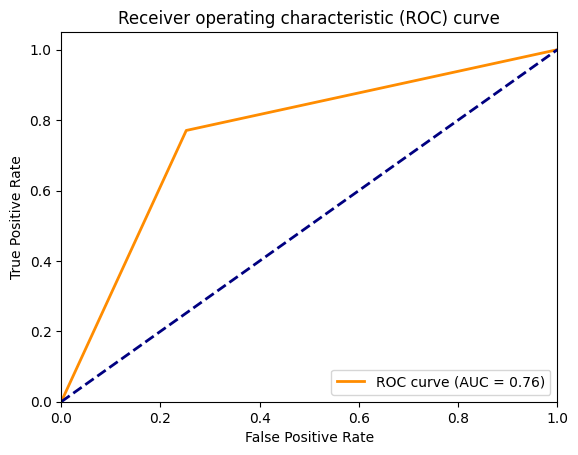

In [85]:
# Accuracy
accuracy = accuracy_score(y_test, y_predRL)

# Precision
precision = precision_score(y_test, y_predRL)

# Recall
recall = recall_score(y_test, y_predRL)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test, y_predRL)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#print(classification_report(y_test, y_pred))

# 6- Aplicar modelo manual

In [97]:
#KNN manual
class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors=5, weights='distance'):

        self.X_train = X_train
        self.y_train = y_train
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.n_classes = 11

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []
        point_dist = []
        for x_test in X_test.iterrows():
            point_dist += [ self.euclidian_distance(X_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            return y_pred

        if self.weights == 'distance':

            # Encontrar el indice y distancia de cada vecino para cada punto
            dist, neighbors = self.kneighbors(X_test, return_distance=True)
            
            # Array de la prediccion
            y_pred = np.zeros(X_test.shape[0], dtype=int)
            
            # para cada valor de prueba
            for i, neighbor_indices in enumerate(neighbors):
                # El inverso de la distancia es el peso
                weights = 1.0 / (dist[i] + 1e-6) #se suma 1e-6 para evitar div/0
                
                # Obtenemos el label del vecino
                neighbor_labels = self.y_train[neighbor_indices]
                
                # Calculamos el peso por cada label
                class_scores = np.bincount(neighbor_labels, weights=weights, minlength=self.n_classes)
                
                # Elegimos el label con el mayor peso
                y_pred[i] = np.argmax(class_scores)
                
            return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test



In [98]:
our_classifier = KNearestNeighbors(X_train, y_train)
our_accuracy_u, y_pred_u, y_test_u = our_classifier.score(X_test.astype('float'), y_test.astype('float'))

Accuracy: 0.46
Precision: 0.46
Recall: 1.00


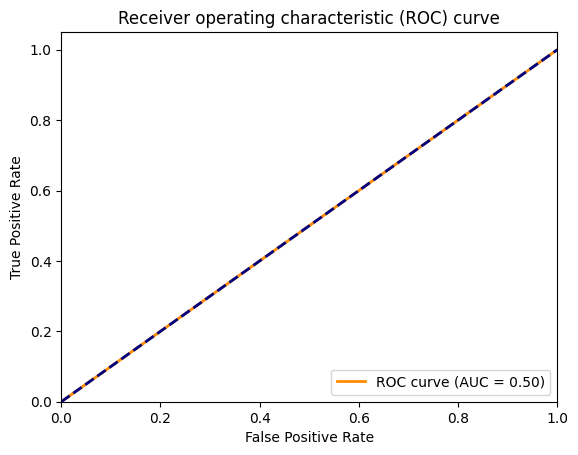

In [91]:
# Accuracy
accuracy = accuracy_score(y_test_u,y_pred_u)

# Precision
precision = precision_score(y_test_u,y_pred_u)

# Recall
recall = recall_score(y_test_u, y_pred_u)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test_u, y_pred_u)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#print(classification_report(y_test, y_pred))

In [92]:
#Regresion logica
class OurLogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
       

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        self.w = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.w)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-y)) / y.size
            self.w -= self.lr * gradient

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.w))

    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold
    def score(self, y_pred,y_test):
        return float(sum(y_pred == y_test)) / float(len(y_test))

In [93]:
model = OurLogisticRegression(lr=0.9, num_iter=650)
model.fit(X_train, y_train)
probs = model.predict_prob(X_test)
y_predORL = model.predict(X_test, 0.5)

Accuracy: 0.77
Precision: 0.73
Recall: 0.78


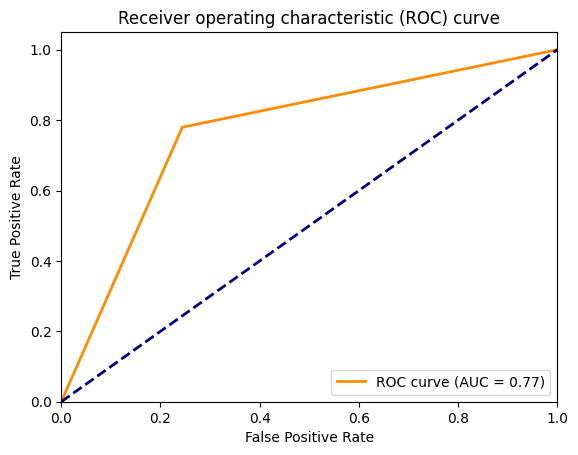

In [94]:
# Accuracy
accuracy = accuracy_score(y_test, y_predORL)

# Precision
precision = precision_score(y_test, y_predORL)

# Recall
recall = recall_score(y_test, y_predORL)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test, y_predORL)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#print(classification_report(y_test, y_pred))

In [ ]:
#Arbol de desiciones manul
class DecisionTreeClassifier(object):
    def __init__(self, max_depth):
        self.depth = 0
        self.max_depth = max_depth
    
    def fit(self, x, y, par_node={}, depth=0):
        if par_node is None: 
            return None
        elif len(y) == 0:
            return None
        elif self.all_same(y):
            return {'val':y[0]}
        elif depth >= self.max_depth:
            return None
        else: 
            col, cutoff, entropy = self.find_best_split_of_all(x, y)    # find one split given an information gain 
            y_left = y[x[:, col] < cutoff]
            y_right = y[x[:, col] >= cutoff]
            par_node = {'col': iris.feature_names[col], 'index_col':col,
                        'cutoff':cutoff,
                       'val': np.round(np.mean(y))}
            par_node['left'] = self.fit(x[x[:, col] < cutoff], y_left, {}, depth+1)
            par_node['right'] = self.fit(x[x[:, col] >= cutoff], y_right, {}, depth+1)
            self.depth += 1 
            self.trees = par_node
            return par_node
    
    #all features versus values, get best
    def find_best_split_of_all(self, x, y):
        #print(x.shape, y.shape)
        col = None
        min_entropy = 1
        cutoff = None
        for i, c in enumerate(x.T):
            entropy, cur_cutoff = self.find_best_split(c, y)
            if entropy == 0:    # find the first perfect cutoff. Stop Iterating
                return i, cur_cutoff, entropy
            elif entropy <= min_entropy:
                min_entropy = entropy
                col = i
                cutoff = cur_cutoff
        return col, cutoff, min_entropy
    
    #one feature versus values
    def find_best_split(self, col, y):
        min_entropy = 10
        n = len(y)
        for value in set(col):
            y_predict = col < value #get which ones are less than
            my_entropy = get_entropy(y_predict, y)
            if my_entropy <= min_entropy:
                min_entropy = my_entropy
                cutoff = value
        return min_entropy, cutoff
    
    def all_same(self, items):
        return all(x == items[0] for x in items)
                                           
    def predict(self, x):
        tree = self.trees
        results = np.array([0]*len(x))
        for i, c in enumerate(x):
            results[i] = self._get_prediction(c)
        return results
    
    def _get_prediction(self, row):
        cur_layer = self.trees
        while cur_layer.get('cutoff'):
            if row[cur_layer['index_col']] < cur_layer['cutoff']:
                cur_layer = cur_layer['left']
            else:
                cur_layer = cur_layer['right']
        else:
            return cur_layer.get('val')

In [102]:
# Entrenar el modelo
model = DecisionTreeClassifier(max_depth=5)
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
tree = model.fit(X_train, y_train)
y_predORL = model.predict(X_test)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
(943, 11)
(943,)
(236, 11)


Accuracy: 0.69
Precision: 0.63
Recall: 0.76


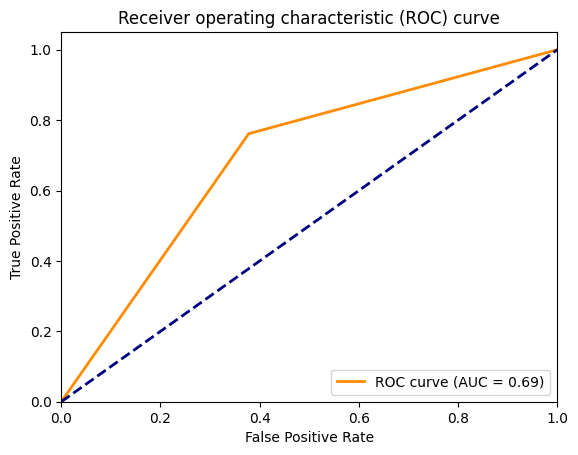

In [100]:
# Accuracy
accuracy = accuracy_score(y_test, y_predORL)

# Precision
precision = precision_score(y_test, y_predORL)

# Recall
recall = recall_score(y_test, y_predORL)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test, y_predORL)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#print(classification_report(y_test, y_pred))